<a href="https://colab.research.google.com/github/Irani-Lutfiani-Putri/Tubes-DL-Heart-Prediction/blob/main/TUBES_DL_2318023_IraniLutfianiPutri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Studi Kasus: Prediksi Gagal Jantung (Binary Classification) dan Menggunakan Metode Deep Neural Network**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models

**1. LOAD DATASET**

In [12]:
df = pd.read_csv('heart.csv')
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


**2. PREPROCESSING**

In [13]:
# Mengubah data teks (Categorical) menjadi angka
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Memisahkan Fitur (X) dan Target (y)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi Data (Penting untuk Deep Learning agar konvergen lebih cepat)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**3. MEMBANGUN ARSITEKTUR MODEL (DNN)**

In [14]:
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)), # Input Layer
    layers.Dropout(0.2), # Mencegah Overfitting
    layers.Dense(16, activation='relu'), # Hidden Layer
    layers.Dense(1, activation='sigmoid') # Output Layer (Sigmoid untuk 0/1)
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**4. TRAINING MODEL**

In [15]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6074 - loss: 0.6650 - val_accuracy: 0.7880 - val_loss: 0.5575
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8009 - loss: 0.4973 - val_accuracy: 0.8424 - val_loss: 0.4501
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8166 - loss: 0.4201 - val_accuracy: 0.8478 - val_loss: 0.4110
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8349 - loss: 0.3935 - val_accuracy: 0.8478 - val_loss: 0.3987
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8320 - loss: 0.3864 - val_accuracy: 0.8478 - val_loss: 0.3852
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8461 - loss: 0.3406 - val_accuracy: 0.8424 - val_loss: 0.3796
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8620 - loss: 0.3348 - val_accuracy: 0.8533 - val_loss: 0.3700
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8441 - loss: 0.3658 - val_accuracy: 0.8533 - val_loss

**5. VISUALISASI HASIL (Untuk Slide PPT)**

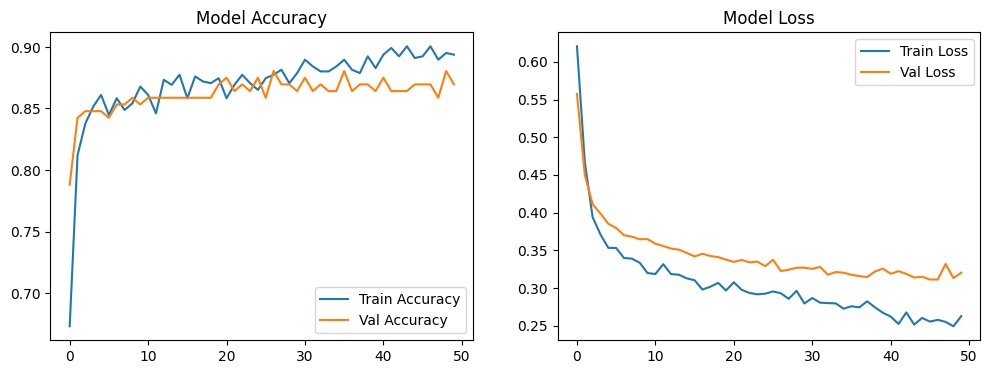

In [16]:
plt.figure(figsize=(12, 4))

# Grafik Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Grafik Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

**6. EVALUASI AKHIR**

In [17]:
loss, acc = model.evaluate(X_test, y_test)
print(f"\nAkurasi Akhir Model: {acc*100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8389 - loss: 0.3482

Akurasi Akhir Model: 86.96%
